# Algorithmic Fairness, Accountability, and Ethics: 
## Data Analysis on the Berkeley admissions in 1973

* The dataset `BerkeleyAdmissionsData.csv` is a three-way table that presents admissions data at the University of California, Berkeley in 1973 according to the variables department (A, B, C, D, E), gender (male, female), and outcome (admitted, denied) encoded as Yes and No.
* Load the dataset
* Did Berkley admissions in 1973 suffered from gender bias? Why or why not?
    * What methods or metric did you use?
    * Could you find any signs of the Simpson's Paradox? What methods did you use? 

## References
- When you complete the exercise, have a look at [the original paper](https://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

In [5]:
df = pd.read_csv("BerkeleyAdmissionsData.csv")
df.head()

,Dept,Male Yes,Male No,Female Yes,Female No
0,A,512,313,89,19
1,B,313,207,17,8
2,C,120,205,202,391
3,D,138,279,131,244
4,E,53,138,94,299


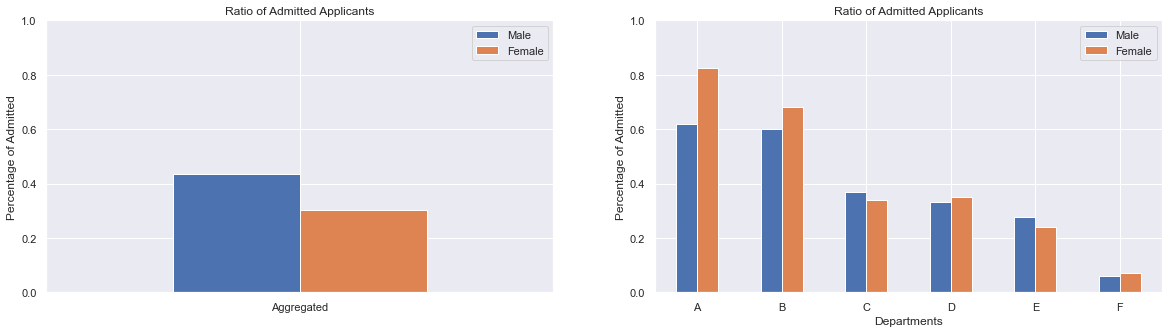

In [8]:
df["MvsM"] = df.apply(lambda x: x["Male Yes"]/ (x["Male No"] + x["Male Yes"]), axis = 1)
df["FvsF"] = df.apply(lambda x: x["Female Yes"]/ (x["Female No"] + x["Female Yes"]), axis = 1)
df["FvsAll"] = df.apply(lambda x: x["Female Yes"]/ (x["Female No"] + x["Female Yes"] + x["Male No"] + x["Male Yes"]), axis = 1)
df["MvsAll"] = df.apply(lambda x: x["Male Yes"]/ (x["Female No"] + x["Female Yes"] + x["Male No"] + x["Male Yes"]), axis = 1)
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0] = df[["Dept","MvsM", "FvsF"]][df["Dept"] == "All"].plot.bar(ax=ax[0], title="Ratio of Admitted Applicants", 
                                                      rot=0, ylabel="Percentage of Admitted", ylim=[0,1])
ax[0].set_xticklabels(["Aggregated"])
ax[0].legend(["Male", "Female"])

ax[1]= df[["Dept","MvsM", "FvsF"]].iloc[0:6].plot.bar(ax=ax[1], title="Ratio of Admitted Applicants", 
                                                      rot=0, ylabel="Percentage of Admitted", xlabel="Departments", ylim=[0,1])
ax[1].set_xticklabels(df["Dept"][0:6])
ax[1].legend(["Male", "Female"])
plt.show()

* **Did Berkley admissions in 1973 suffered from gender bias? Why or why not?**
1. What methods or metric did you use?

We first look at the ratio of admitted applicants over total applicants, divided by gender. If we do so, we see that the university was more likely to admit male applicants, indicating an apparent gender bias against women. 

However, if we look at the ratios of admitted applicants *per each department* (broken down by gender), we see that the general trend observed in the aggregated form disappears: some departments exhibit similar acceptance rates for women and men, some department accept more women than men, while some departments accept slightly more men than women.

If we further look at the number of applicants (see below), we see that females were more like to appliy to deparments with low acceptance ratio (supposedly more competitive departments). These differences in applications preferences explains why we have an apparent gender bias in the aggregated plot. Thus, we can argue that there is **no bias based on gender**, and the discrepancy is explained by the number of applicants in each group (not the admission process of the university).

2. Could you find any signs of the Simpson's Paradox? What methods did you use?

This is the example of the Simpson's Paradox. Per-department aggregation and overall aggregation display oposite trends (thus, leading us to contradicting conclusions)






In [89]:
df["M_num"] = df.apply(lambda x: x["Male Yes"] + x["Male No"], axis = 1)
df["F_num"] = df.apply(lambda x: x["Female Yes"] + x["Female No"], axis = 1)

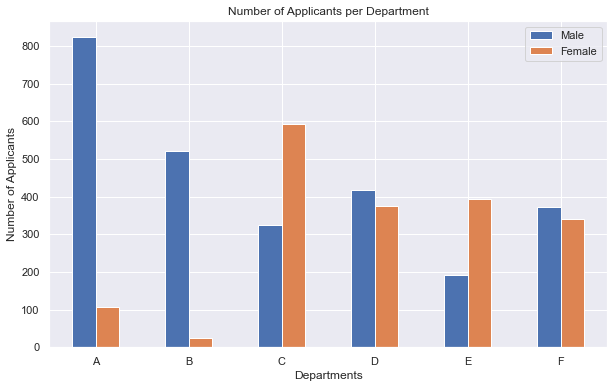

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
df[["M_num", "F_num"]].iloc[0:6].plot.bar(title="Number of Applicants per Department", 
                                                      rot=0, ylabel="Number of Applicants", xlabel="Departments", ax=ax)
ax.set_xticklabels(["A", "B", "C", "D", "E", "F"])
ax.legend(["Male", "Female"])
plt.show()